In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=100, noise=0.2, random_state=0) 

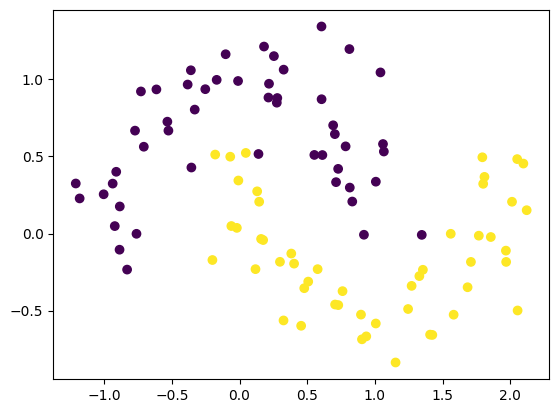

In [5]:
plt.scatter(x[:,0],x[:,1], c = y)

In [6]:
from sklearn.svm import LinearSVC

In [7]:
lsvc = LinearSVC()

In [8]:
lsvc.fit(x,y)

C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [9]:
def plot_decision_boundary(x, y, model):
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
    z = model.predict(np.c_[x1.ravel(), x2.ravel()])
    z = z.reshape(x1.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#F5B9EF', '#BBFFBB', '#F9F9CB'])

    plt.contourf(x1,x2,z,cmap=custom_cmap)
    plt.scatter(x[:,0], x[:,1], c=y)
    plt.show()

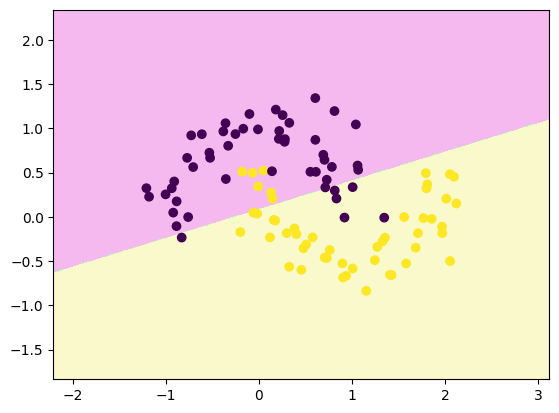

In [10]:
plot_decision_boundary(x,y,lsvc)

In [11]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [13]:
poly_svc = Pipeline([
    ("poly", PolynomialFeatures(degree=3)),
    ("std_scaler", StandardScaler()),
    ("linearSVC", LinearSVC())
])

In [14]:
poly_svc.fit(x,y)

C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()), ('linearSVC', LinearSVC())])

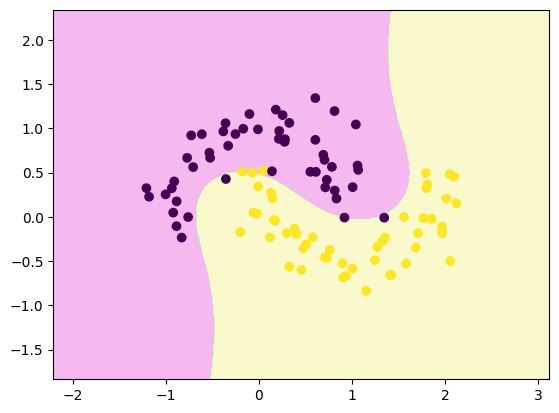

In [15]:
plot_decision_boundary(x,y,poly_svc)

### 核函数解决非线性问题

In [18]:
from sklearn.svm import SVC

In [22]:
poly_svc = Pipeline([
    ("std_scaler", StandardScaler()),
    ("polySVC", SVC(kernel='poly', degree=3))
])

In [23]:
poly_svc.fit(x,y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('polySVC', SVC(kernel='poly'))])

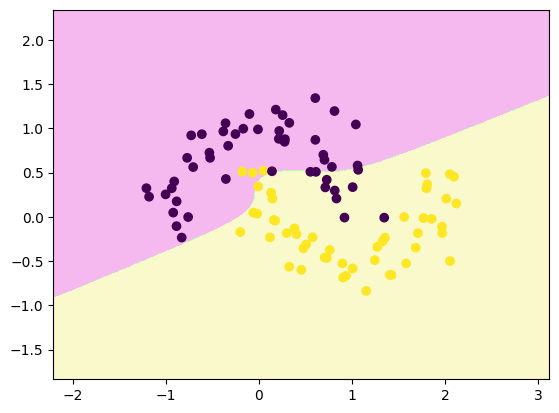

In [24]:
plot_decision_boundary(x,y,poly_svc)

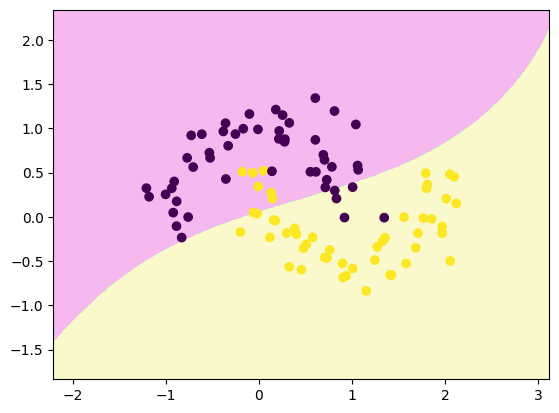

In [26]:
poly_svc = Pipeline([
    ("std_scaler", StandardScaler()),
    ("rbfSVC", SVC(kernel='rbf', gamma=0.1))
])
poly_svc.fit(x,y)
plot_decision_boundary(x,y,poly_svc)

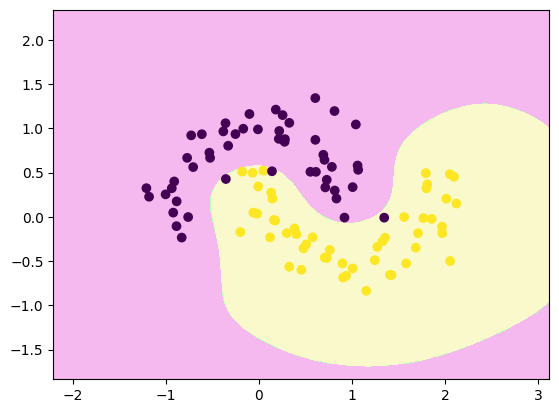

In [27]:
poly_svc = Pipeline([
    ("std_scaler", StandardScaler()),
    ("rbfSVC", SVC(kernel='rbf', gamma=1))
])
poly_svc.fit(x,y)
plot_decision_boundary(x,y,poly_svc)

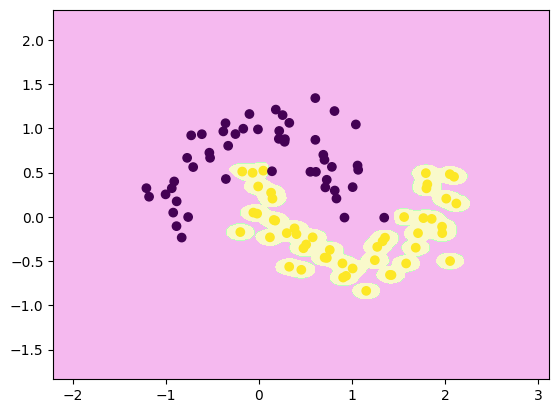

In [29]:
poly_svc = Pipeline([
    ("std_scaler", StandardScaler()),
    ("rbfSVC", SVC(kernel='rbf', gamma=100))
])
poly_svc.fit(x,y)
plot_decision_boundary(x,y,poly_svc)